In [1]:
import time
import random
import os
import numpy as np
import pandas as pd
import seaborn as sns

from bokeh import *
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
from sklearn import metrics
from sklearn.metrics import auc,roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import *
import scikitplot as skplt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 
import os
os.chdir("C:\\Computer_Vision")

import warnings
warnings.filterwarnings("ignore") 

Loading BokehJS ...

In [2]:
pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',100)

# Load Data

In [3]:
Active_customers = pd.read_excel("segmentt.xlsx" , sheet_name = "new"  )

print("imported successfully")

imported successfully


In [4]:
Churned_customers = pd.read_excel("segmentt.xlsx" , sheet_name = "past"  )

print("imported successfully")

imported successfully


In [5]:
print("The shape of the Active_Customers : " , Active_customers.shape)

The shape of the Active_Customers :  (9999, 29)


In [6]:
print("The shape of the Churned_Customers : " , Churned_customers.shape)

The shape of the Churned_Customers :  (10000, 30)


In [7]:
Active_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SITE_ACCOUNT_NUMBER        9998 non-null   object        
 1   ACCOUNT_STATUS             9998 non-null   object        
 2   FIRST_COMMUNICATION_DATE   9989 non-null   datetime64[ns]
 3   UPGRADE_DATE               9989 non-null   datetime64[ns]
 4   SERVICE_ PLAN              8760 non-null   object        
 5   MODEL                      9323 non-null   object        
 6   SALES_CHANNEL              7093 non-null   object        
 7   DIRECT_INDIRECT_CHANNEL    9954 non-null   object        
 8   SALES_SOURCE               9306 non-null   object        
 9   COMPANY_SOURCE_NAME        9988 non-null   object        
 10  FIRST_NAME                 9998 non-null   object        
 11  LAST_NAME                  9998 non-null   object        
 12  ADDRES

In [8]:
Churned_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SITE_ACCOUNT_NUMBER        10000 non-null  object        
 1   ACCOUNT_STATUS             9985 non-null   object        
 2   FIRST_COMMUNICATION_DATE   10000 non-null  datetime64[ns]
 3   CHURN_DATE                 10000 non-null  datetime64[ns]
 4   UPGRADE_DATE               9121 non-null   datetime64[ns]
 5   SERVICE_PLAN               8518 non-null   object        
 6   MODEL                      9290 non-null   object        
 7   SALES_CHANNEL              7398 non-null   object        
 8   DIRECT_INDIRECT_CHANNEL    9216 non-null   object        
 9   SALES_SOURCE               9710 non-null   object        
 10  COMPANY_SOURCE_NAME        9992 non-null   object        
 11  FIRST_NAME                 9974 non-null   object        
 12  LAST_

In [9]:
Active_customers.columns = ['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER']

# Visualizing Missing Values

In [10]:
Active_customers.isnull().sum()[Active_customers.isnull().sum()!=0]

SITE_ACCOUNT_NUMBER             1
ACCOUNT_STATUS                  1
FIRST_COMMUNICATION_DATE       10
UPGRADE_DATE                   10
SERVICE_PLAN                 1239
MODEL                         676
SALES_CHANNEL                2906
DIRECT_INDIRECT_CHANNEL        45
SALES_SOURCE                  693
COMPANY_SOURCE_NAME            11
FIRST_NAME                      1
LAST_NAME                       1
ADDRESS                        54
CITY                            1
STATE                          22
ZIPCODE                        22
EMAIL_ADDRESS                  20
FEEDBACK                     1914
SATELLITE                     396
SITE_TYPE_DESC                 11
WARRANTY_NAME                 957
MOST_RECENT_SALES_CHANNEL       7
GENDER                       1271
DATE_OF_BIRTH                   1
AGE                             1
INCOME                        318
MARITAL_STATUS                319
PRESENCE_OF_CHILDREN         1315
COMPUTER_OWNER               3055
dtype: int64

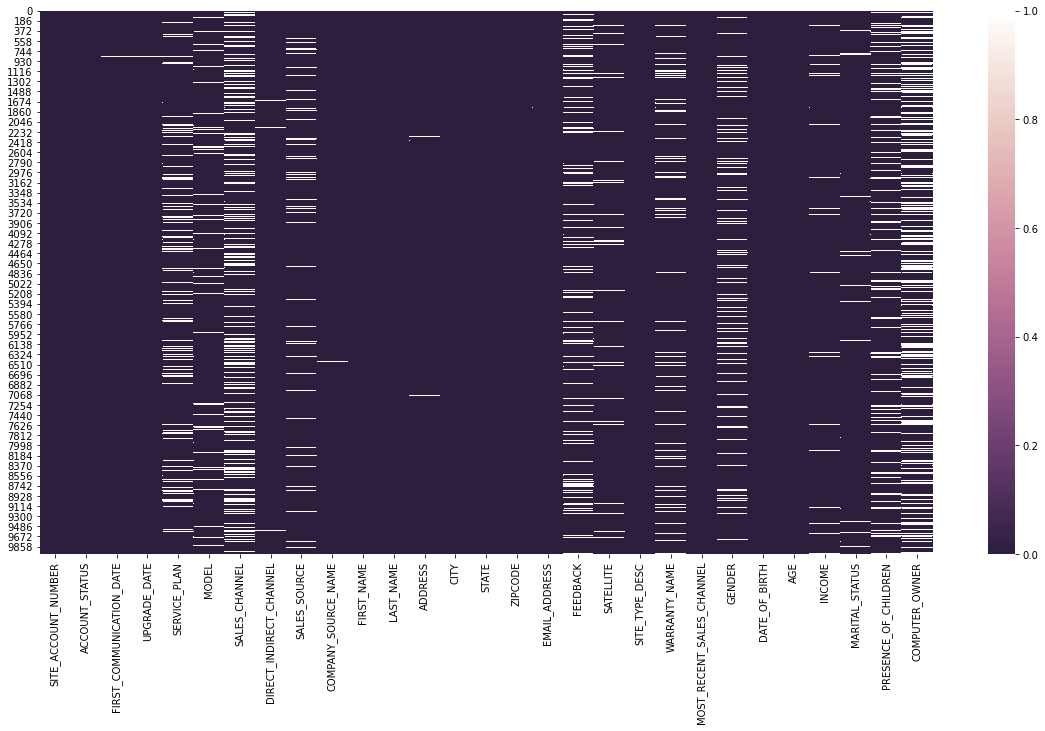

In [11]:
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(Active_customers.isnull(), cmap=cmap)

In [12]:
Churned_customers.isnull().sum()[Churned_customers.isnull().sum()!=0]

ACCOUNT_STATUS                 15
UPGRADE_DATE                  879
SERVICE_PLAN                 1482
MODEL                         710
SALES_CHANNEL                2602
DIRECT_INDIRECT_CHANNEL       784
SALES_SOURCE                  290
COMPANY_SOURCE_NAME             8
FIRST_NAME                     26
LAST_NAME                       7
ADDRESS                         9
STATE                          45
ZIPCODE                        45
EMAIL_ADDRESS                  20
FEEDBACK                     2028
SATELLITE                    1013
SITE_TYPE_DESC                 63
WARRANTY_NAME                 681
MOST_RECENT_SALES_CHANNEL      21
GENDER                       1238
DATE_OF_BIRTH                   8
AGE                             8
MARITAL_STATUS                281
PRESENCE_OF_CHILDREN         1252
COMPUTER_OWNER               3243
dtype: int64

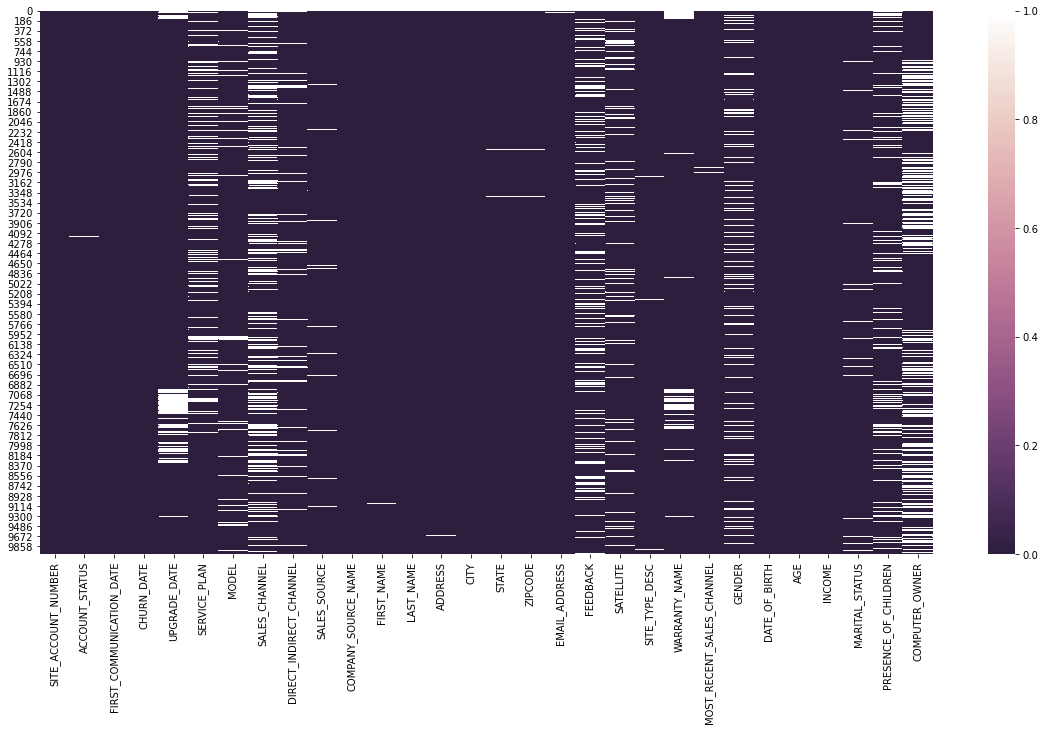

In [13]:
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(Churned_customers.isnull(), cmap=cmap)

In [14]:
obj_cols = Active_customers.select_dtypes("object")

In [15]:
num_cols = Active_customers.select_dtypes(["int64","float64"])

# Categorical Data

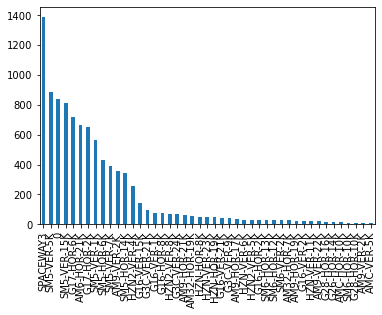

In [16]:
Active_customers['SATELLITE'].value_counts().plot(kind="bar") #0 seems confusing here, am considering it as Unknown.

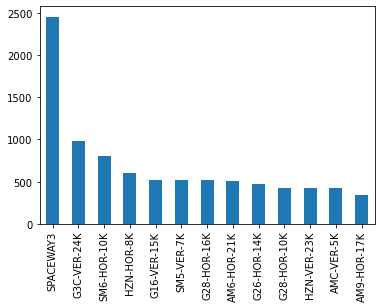

In [17]:
Churned_customers['SATELLITE'].value_counts().plot(kind="bar") #0 seems confusing here, am considering it as Unknown.

In [18]:
Active_customers['SATELLITE'].replace(0,"Unknown-",inplace=True) #considering 0 as Unknown.
Churned_customers['SATELLITE'].replace(0,"Unknown-",inplace=True) #considering 0 as Unknown.

In [19]:
Churned_customers['SATELLITE'].isnull().sum() #Since Satellite do have Missing Values, 

1013

In [20]:
Active_customers['SATELLITE'].isnull().sum() #Since Satellite do have Missing Values, 

396

In [21]:
def Satellite(df,col):
    Satellite = [ ]
    for i in df[col]:
        temp = str(i)
    
        if(temp=="nan"):
            Satellite.append(np.nan)
        else:
            p = temp.split("-",1)
            Satellite.append(p[0])
    return(Satellite)

In [22]:
Active_customers['Satellite'] = Satellite(Active_customers,"SATELLITE")

In [23]:
Churned_customers['Satellite'] = Satellite(Churned_customers,"SATELLITE")

In [24]:
Active_customers['SATELLITE'].isnull().sum() #Since Satellite do have Missing Values, 

396

In [25]:
Churned_customers.Satellite.isnull().sum()

1013

In [26]:
Churned_customers.Satellite.fillna("Unknown",inplace=True)

In [27]:
plt.rcParams["figure.figsize"] = (5,5)

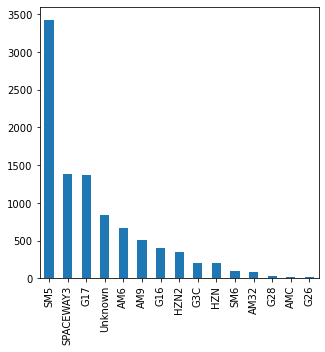

In [28]:
Active_customers['Satellite'].value_counts().plot(kind="bar") #0 seems confusing here, am considering it as Unknown.

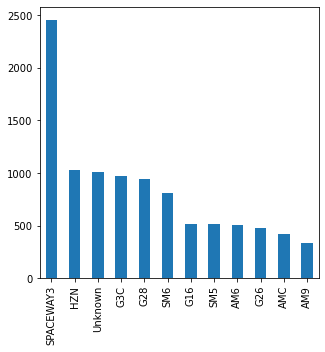

In [29]:
Churned_customers['Satellite'].value_counts().plot(kind="bar") #0 seems confusing here, am considering it as Unknown.

In [30]:
Active_customers.replace("HZN2","HZN",inplace=True)

In [31]:
Active_customers.replace("G17","G16",inplace=True)

In [32]:
Active_customers.replace("AM32","AM9",inplace=True)

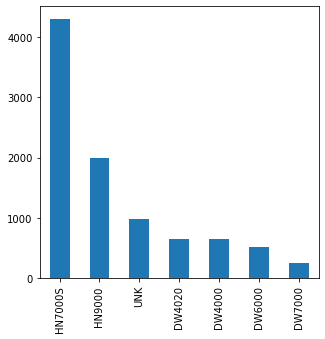

In [33]:
Active_customers.MODEL.value_counts().plot(kind="bar")

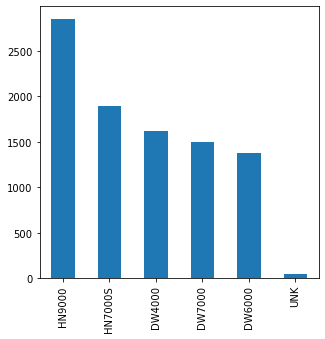

In [34]:
Churned_customers.MODEL.value_counts().plot(kind="bar")

In [35]:
Active_customers.replace("DW4020","DW4000",inplace=True)

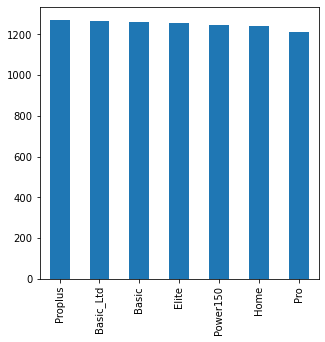

In [36]:
Active_customers['SERVICE_PLAN'].value_counts().plot(kind="bar")

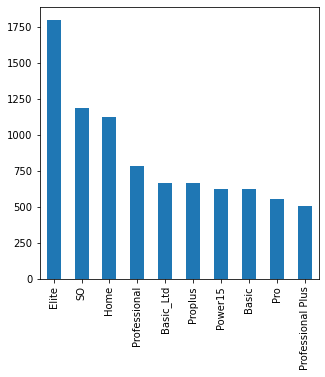

In [37]:
Churned_customers['SERVICE_PLAN'].value_counts().plot(kind="bar")

In [38]:
Churned_customers['SERVICE_PLAN'].isnull().sum()

1482

In [39]:
Active_customers['SERVICE_PLAN'].isnull().sum()

1239

In [40]:
Churned_customers['SERVICE_PLAN'].replace("Professional Plus","Proplus",inplace=True)

In [41]:
Churned_customers['SERVICE_PLAN'].replace("power15","Power150",inplace=True)

In [42]:
Churned_customers['SERVICE_PLAN'].replace("Professional","Pro",inplace=True)

In [43]:
obj_cols = Active_customers.select_dtypes("object")
for i in obj_cols.columns :
    
    print("Total Unique Elements in ", i, " : ", Active_customers[i].nunique())
    print("Total Value Count in ", i, " : ", Active_customers[i].value_counts())

Total Unique Elements in  SITE_ACCOUNT_NUMBER  :  9998
Total Value Count in  SITE_ACCOUNT_NUMBER  :  AMR-34328911    1
AMR-23745688    1
AMR-20626834    1
AMR-39063139    1
AMR-39714318    1
               ..
AMR-47244205    1
AMR-44075529    1
AMR-44513813    1
AMR-21516650    1
AMR-18206724    1
Name: SITE_ACCOUNT_NUMBER, Length: 9998, dtype: int64
Total Unique Elements in  ACCOUNT_STATUS  :  2
Total Value Count in  ACCOUNT_STATUS  :  Active      9985
Inactive      13
Name: ACCOUNT_STATUS, dtype: int64
Total Unique Elements in  SERVICE_PLAN  :  7
Total Value Count in  SERVICE_PLAN  :  Proplus      1272
Basic_Ltd    1268
Basic        1263
Elite        1256
Power150     1248
Home         1243
Pro          1210
Name: SERVICE_PLAN, dtype: int64
Total Unique Elements in  MODEL  :  6
Total Value Count in  MODEL  :  HN7000S    4296
HN9000     1985
DW4000     1300
UNK         977
DW6000      514
DW7000      251
Name: MODEL, dtype: int64
Total Unique Elements in  SALES_CHANNEL  :  5
Total Val

# Merging 

In [44]:
#Active_customers.columns = Churned_customers.columns

combined_df = pd.concat([Active_customers,Churned_customers], ignore_index=True)

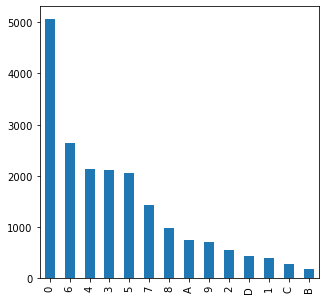

In [45]:
combined_df.INCOME.value_counts().plot(kind="bar")  # Income is categorised between Income Ranges

In [46]:
combined_df.CITY.nunique() #Too much Names, Too costly to process and keep

828

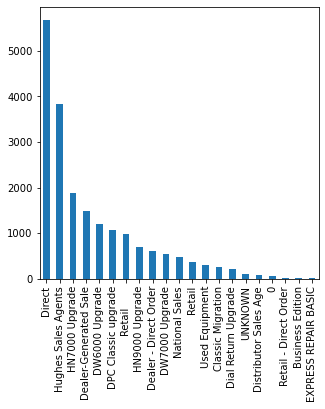

In [47]:
combined_df.MOST_RECENT_SALES_CHANNEL.value_counts().plot(kind="bar")

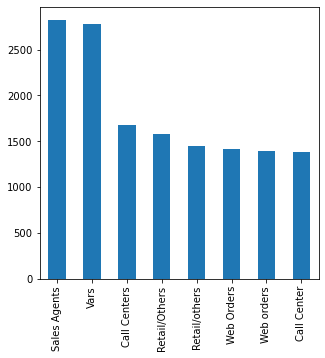

In [48]:
combined_df.SALES_CHANNEL.value_counts().plot(kind="bar")

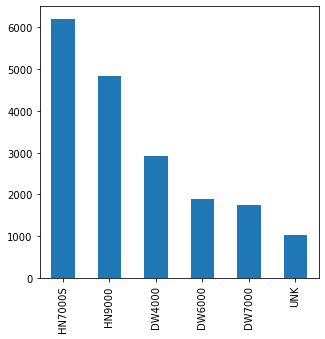

In [49]:
combined_df.MODEL.value_counts().plot(kind="bar")

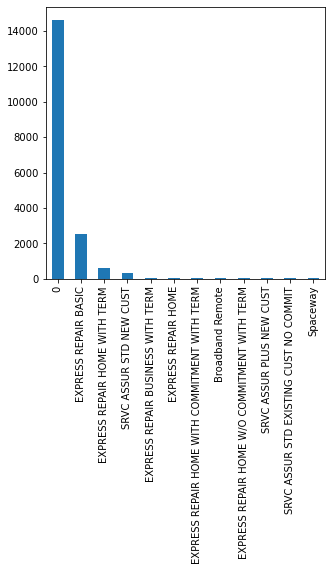

In [50]:
combined_df.WARRANTY_NAME.value_counts().plot(kind="bar") # This 0 is suspicious here, am gonna take it as unknown

In [51]:
combined_df.SALES_SOURCE.nunique()

150

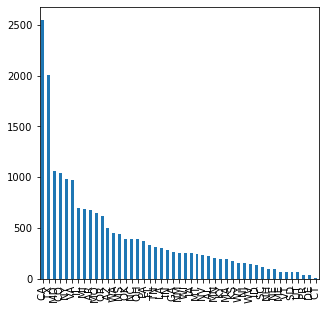

In [52]:
combined_df.STATE.value_counts().plot(kind="bar") #Total 47 states, where CA is at top followed by Texas and MD.

# Feature Engineering

In [53]:
combined_df.INCOME.isnull().sum()

318

In [54]:
lizzt = []
for i in combined_df['INCOME']:
    temp=str(i)
    if(temp=="nan"):
        temp = np.nan
    elif temp == "A":
        temp=11
    elif temp == "B":
        temp=12
    elif temp == "C":
        temp=13
    elif temp == "D":
        temp=14
    else:
        temp=i
    lizzt.append(temp)

In [55]:
combined_df["Income"] = lizzt

In [56]:
combined_df.Satellite.value_counts()

SM5          3948
SPACEWAY3    3845
G16          2287
Unknown      1855
HZN          1586
G3C          1185
AM6          1171
G28           975
AM9           920
SM6           901
G26           491
AMC           439
Name: Satellite, dtype: int64

In [57]:
combined_df.CITY.nunique()

828

In [58]:
combined_df.ZIPCODE.nunique()  #The Value seems to be suspicious. Not considering

896

In [59]:
combined_df.dtypes

SITE_ACCOUNT_NUMBER                  object
ACCOUNT_STATUS                       object
FIRST_COMMUNICATION_DATE     datetime64[ns]
UPGRADE_DATE                 datetime64[ns]
SERVICE_PLAN                         object
MODEL                                object
SALES_CHANNEL                        object
DIRECT_INDIRECT_CHANNEL              object
SALES_SOURCE                         object
COMPANY_SOURCE_NAME                  object
FIRST_NAME                           object
LAST_NAME                            object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIPCODE                              object
EMAIL_ADDRESS                        object
FEEDBACK                             object
SATELLITE                            object
SITE_TYPE_DESC                       object
WARRANTY_NAME                        object
MOST_RECENT_SALES_CHANNEL            object
GENDER                          

In [60]:
combined_df.MARITAL_STATUS.replace(".",np.nan,inplace=True)

In [61]:
combined_df.AGE.replace(".",np.nan , inplace=True)

In [62]:
combined = combined_df.drop(['SITE_ACCOUNT_NUMBER',  'FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE',
                                    'SALES_SOURCE', 'COMPANY_SOURCE_NAME','FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 
                                    "STATE",  'EMAIL_ADDRESS','SATELLITE', 'DATE_OF_BIRTH','INCOME',
                            "WARRANTY_NAME","MOST_RECENT_SALES_CHANNEL","CHURN_DATE"] , axis=1)

In [63]:
combined.isnull().sum()[combined.isnull().sum()!=0]

ACCOUNT_STATUS               16
SERVICE_PLAN               2721
MODEL                      1386
SALES_CHANNEL              5508
DIRECT_INDIRECT_CHANNEL     829
ZIPCODE                      67
FEEDBACK                   3942
SITE_TYPE_DESC               74
GENDER                     2509
AGE                         365
MARITAL_STATUS             3941
PRESENCE_OF_CHILDREN       2567
COMPUTER_OWNER             6298
Satellite                   396
Income                      318
dtype: int64

# Missing Values Treatment

In [64]:
combined['MODEL'].fillna(str(combined['MODEL'].mode()[0]) , inplace=True)

combined['SALES_CHANNEL'].fillna(str(combined['SALES_CHANNEL'].mode()[0]) , inplace=True)

combined['DIRECT_INDIRECT_CHANNEL'].fillna(str(combined['DIRECT_INDIRECT_CHANNEL'].mode()[0]) , inplace=True)

combined['SITE_TYPE_DESC'].fillna(str(combined['SITE_TYPE_DESC'].mode()[0]) , inplace=True)

combined['GENDER'].fillna(str(combined['GENDER'].mode()[0]) , inplace=True)

combined['MARITAL_STATUS'].fillna(str(combined['MARITAL_STATUS'].mode()[0]) , inplace=True)

combined['PRESENCE_OF_CHILDREN'].fillna(str(combined['PRESENCE_OF_CHILDREN'].mode()[0]) , inplace=True)

In [65]:
combined['SERVICE_PLAN'].fillna(("Unknown") , inplace=True)

combined['FEEDBACK'].fillna(str(combined['FEEDBACK'].mode()[0]) , inplace=True)

combined['COMPUTER_OWNER'].fillna(str(combined['COMPUTER_OWNER'].mode()[0]) , inplace=True)

combined['Income'].fillna(str(combined['Income'].mode()[0]) , inplace=True)

combined['ACCOUNT_STATUS'].fillna(str(combined['ACCOUNT_STATUS'].mode()[0]) , inplace=True)

combined['Satellite'].fillna("Unknown" , inplace=True)

In [66]:
combined.AGE.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.99])

count    19634.000000
mean        46.792146
std         14.291461
min         22.000000
1%          22.000000
5%          24.000000
10%         27.000000
25%         35.000000
50%         47.000000
75%         58.000000
90%         66.000000
95%         70.000000
99%         77.000000
max         92.000000
Name: AGE, dtype: float64

In [67]:
combined.AGE.replace(".",np.nan,inplace=True)

In [68]:
combined.AGE.isnull().sum()

365

In [69]:
len( combined [combined.AGE > 85] )

54

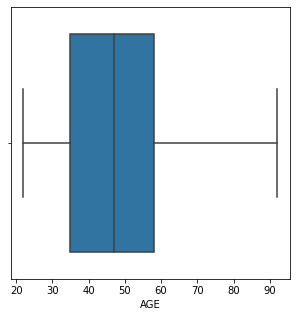

In [70]:
sns.boxplot(combined.AGE)

In [71]:
combined.AGE.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.99])

count    19634.000000
mean        46.792146
std         14.291461
min         22.000000
1%          22.000000
5%          24.000000
10%         27.000000
25%         35.000000
50%         47.000000
75%         58.000000
90%         66.000000
95%         70.000000
99%         77.000000
max         92.000000
Name: AGE, dtype: float64

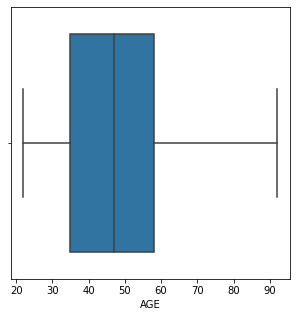

In [72]:
sns.boxplot(combined.AGE)

In [73]:
#Seems Better now with No outliers, now we can directly put mean.

combined['AGE'].fillna(int(combined['AGE'].median()) , inplace=True)

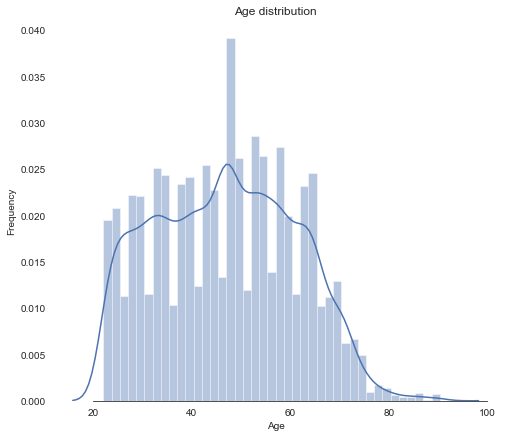

In [74]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(combined['AGE'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Age")
ax.set(title="Age distribution")
sns.despine(trim=True, left=True)
plt.show()

In [75]:
combined.dtypes

ACCOUNT_STATUS              object
SERVICE_PLAN                object
MODEL                       object
SALES_CHANNEL               object
DIRECT_INDIRECT_CHANNEL     object
ZIPCODE                     object
FEEDBACK                    object
SITE_TYPE_DESC              object
GENDER                      object
AGE                        float64
MARITAL_STATUS              object
PRESENCE_OF_CHILDREN        object
COMPUTER_OWNER              object
Satellite                   object
Income                      object
dtype: object

In [76]:
combined.ZIPCODE.isnull().sum()

67

In [77]:
combined.ZIPCODE.replace(" ",np.nan,inplace=True)

In [78]:
combined.ZIPCODE.isnull().sum()

230

In [79]:
Zip = [ ]

for i in combined.ZIPCODE:
    if(str(i)=="nan"):
       
        Zip.append(np.nan)
    elif(len(str(i))<=6):
        
        Zip.append(np.nan)
    else:
        temp = str(i)
        p = temp.split(".")
        p = p[0]
        q = list(map( int , p))
        q = q[0]
        
        Zip.append(q)

In [80]:
combined [ "Zip" ] = Zip

In [81]:
combined.Zip.fillna(0 , inplace = True)

In [82]:
combined.Zip.isnull().sum()

0

In [83]:
combined.drop(["ZIPCODE"],inplace=True,axis=1)

In [84]:
combined.Zip.value_counts()

9.0    3626
7.0    3381
2.0    2703
8.0    2400
6.0    1620
3.0    1582
4.0    1567
1.0    1393
5.0    1023
0.0     704
Name: Zip, dtype: int64

In [85]:
combined.dtypes

ACCOUNT_STATUS              object
SERVICE_PLAN                object
MODEL                       object
SALES_CHANNEL               object
DIRECT_INDIRECT_CHANNEL     object
FEEDBACK                    object
SITE_TYPE_DESC              object
GENDER                      object
AGE                        float64
MARITAL_STATUS              object
PRESENCE_OF_CHILDREN        object
COMPUTER_OWNER              object
Satellite                   object
Income                      object
Zip                        float64
dtype: object

In [86]:
combined

,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,Satellite,Income,Zip
0,Active,Unknown,HN9000,Vars,Indirect,BAD,Broadband Remote,2,69.0,1,0,N,SPACEWAY3,0,2.0
1,Active,Pro,HN7000S,Sales Agents,Indirect,GOOD,Spaceway,2,43.0,1,0,N,HZN,4,0.0
2,Active,Power150,HN9000,Call Center,Indirect,BAD,Broadband Remote,2,58.0,1,0,N,SM5,4,7.0
3,Active,Power150,DW6000,Sales Agents,Direct,BAD,Spaceway,1.0,22.0,1,1,N,SPACEWAY3,6,4.0
4,Active,Home,HN7000S,Call Center,Indirect,GOOD,Broadband Remote,1,36.0,0,0,N,Unknown,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,Closed,Basic,HN9000,Call Centers,Indirect,GOOD,Spaceway,2,49.0,0.0,1,N,G28,3,7.0
19995,Closed,Proplus,DW6000,Retail/Others,Direct,BAD,Spaceway,2,38.0,1,1,Y,G28,2,7.0
19996,Closed,Home,DW4000,Retail/Others,Indirect,BAD,Broadband Remote,2,67.0,0,0,N,SPACEWAY3,8,3.0
19997,Closed,Power15,DW6000,Sales Agents,Indirect,BAD,Broadband Remote,1,63.0,0.0,0.0,N,SPACEWAY3,0,7.0


In [87]:
for i in combined.columns :
    
    print("Total Unique Elements in ", i, " : ", combined[i].nunique())
    print("Total Value Count in ", i, " : ", combined[i].value_counts())

Total Unique Elements in  ACCOUNT_STATUS  :  3
Total Value Count in  ACCOUNT_STATUS  :  Active      10001
Closed       9985
Inactive       13
Name: ACCOUNT_STATUS, dtype: int64
Total Unique Elements in  SERVICE_PLAN  :  10
Total Value Count in  SERVICE_PLAN  :  Elite        3051
Unknown      2721
Pro          2545
Proplus      2441
Home         2365
Basic_Ltd    1934
Basic        1886
Power150     1248
SO           1184
Power15       624
Name: SERVICE_PLAN, dtype: int64
Total Unique Elements in  MODEL  :  6
Total Value Count in  MODEL  :  HN7000S    7581
HN9000     4835
DW4000     2918
DW6000     1894
DW7000     1751
UNK        1020
Name: MODEL, dtype: int64
Total Unique Elements in  SALES_CHANNEL  :  8
Total Value Count in  SALES_CHANNEL  :  Sales Agents     8333
Vars             2778
Call Centers     1675
Retail/Others    1576
Retail/others    1445
Web Orders       1419
Web orders       1391
Call Center      1382
Name: SALES_CHANNEL, dtype: int64
Total Unique Elements in  DIRECT_INDI

In [88]:
combined.ACCOUNT_STATUS.replace("Inactive","Closed",inplace=True)

In [89]:
combined.ACCOUNT_STATUS.replace("0.0","Closed",inplace=True)

In [90]:
combined = combined.astype({ "Zip": "int" , 'GENDER': 'float', "PRESENCE_OF_CHILDREN" : "float", 
                              "Income" : "float",'MARITAL_STATUS' : 'float' } )

In [91]:
cleanup_nums =  {"DIRECT_INDIRECT_CHANNEL":     {"Indirect" : 0, "Direct" : 1} ,"FEEDBACK" : { "BAD" : 0, "GOOD" : 1} 
                 , "COMPUTER_OWNER" : {"N" : 0 , "Y" : 1 } , "GENDER" : {1.0 : 1 , 2.0 : 0 },
                "SITE_TYPE_DESC":     {"Broadband Remote" : 0, "Spaceway" : 1},
                 "ACCOUNT_STATUS":     {"Active" : 0, "Closed" : 1} }
                    

In [92]:
combined.replace(cleanup_nums,inplace=True)

In [93]:
combined.dtypes

ACCOUNT_STATUS               int64
SERVICE_PLAN                object
MODEL                       object
SALES_CHANNEL               object
DIRECT_INDIRECT_CHANNEL      int64
FEEDBACK                     int64
SITE_TYPE_DESC               int64
GENDER                     float64
AGE                        float64
MARITAL_STATUS             float64
PRESENCE_OF_CHILDREN       float64
COMPUTER_OWNER               int64
Satellite                   object
Income                     float64
Zip                          int32
dtype: object

In [94]:
combined = combined.astype({ "Income": "int64" ,  'MARITAL_STATUS': 'int64' , "PRESENCE_OF_CHILDREN" : "int64", 
                             "AGE" : "int64" , "GENDER" : "int64" } )

In [95]:
combined.Zip.value_counts()

9    3626
7    3381
2    2703
8    2400
6    1620
3    1582
4    1567
1    1393
5    1023
0     704
Name: Zip, dtype: int64

In [97]:
Image(url= "https://d33wubrfki0l68.cloudfront.net/979d9b9012d8bbb1e4f14b85fd7b0dc5f961feaa/109d1/img/docs/zip-code-map.png")

# ZIP Codes Beginning With                        States
                   0                        Connecticut, Massachusetts, Maine, New Hampshire, New Jersey, Puerto Rico, 
                                            Rhode Island, Vermont, Virgin Islands, Army Post Office Europe, 
                                            Fleet Post Office Europe
                   
                   1	                    Delaware, New York, Pennsylvania
                   
                   2	                    District of Columbia, Maryland, North Carolina, South Carolina, 
                                            Virginia, West Virginia
                   
                   3	                    Alabama, Florida, Georgia, Mississippi, Tennessee, 
                                            Army Post Office Americas, Fleet Post Office Americas
                   
                   4	                    Indiana, Kentucky, Michigan, Ohio
                   
                   5	                    Iowa, Minnesota, Montana, North Dakota, South Dakota, Wisconsin
                   
                   6	                    Illinois, Kansas, Missouri, Nebraska
                   
                   7	                    Arkansas, Louisiana, Oklahoma, Texas
                   
                   8	                    Arizona, Colorado, Idaho, New Mexico, Nevada, Utah, Wyoming
                   
                   9	                    Alaska, American Samoa, California, Guam, Hawaii, Marshall Islands, 
                                            Federated States of Micronesia, Northern Mariana Islands, Oregon, Palau,
                                            Washington, Army Post Office Pacific, Fleet Post Office Pacific

In [98]:
combo_df = pd.get_dummies(data = combined, columns = ["SERVICE_PLAN" , "MODEL" ,"SALES_CHANNEL" , "Zip" ,
                                                       "Satellite" , "MARITAL_STATUS"
                                                       ])

In [99]:
X = combo_df.drop(["ACCOUNT_STATUS"],axis=1)
Y = combo_df.ACCOUNT_STATUS

In [100]:
X.head()

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,Income,SERVICE_PLAN_Basic,SERVICE_PLAN_Basic_Ltd,SERVICE_PLAN_Elite,SERVICE_PLAN_Home,SERVICE_PLAN_Power15,SERVICE_PLAN_Power150,SERVICE_PLAN_Pro,SERVICE_PLAN_Proplus,SERVICE_PLAN_SO,SERVICE_PLAN_Unknown,MODEL_DW4000,MODEL_DW6000,MODEL_DW7000,MODEL_HN7000S,MODEL_HN9000,MODEL_UNK,SALES_CHANNEL_Call Center,SALES_CHANNEL_Call Centers,SALES_CHANNEL_Retail/Others,SALES_CHANNEL_Retail/others,SALES_CHANNEL_Sales Agents,SALES_CHANNEL_Vars,SALES_CHANNEL_Web Orders,SALES_CHANNEL_Web orders,Zip_0,Zip_1,Zip_2,Zip_3,Zip_4,Zip_5,Zip_6,Zip_7,Zip_8,Zip_9,Satellite_AM6,Satellite_AM9,Satellite_AMC,Satellite_G16,Satellite_G26,Satellite_G28,Satellite_G3C,Satellite_HZN,Satellite_SM5,Satellite_SM6,Satellite_SPACEWAY3,Satellite_Unknown,MARITAL_STATUS_0,MARITAL_STATUS_1,MARITAL_STATUS_2
0,0,0,0,0,69,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,1,1,0,43,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,58,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,1,1,22,1,0,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,0,1,36,0,0,7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [101]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: ACCOUNT_STATUS, dtype: int64

## Scaling 

In [102]:
StdScaler = StandardScaler()

X[["AGE","Income"]] = StdScaler.fit_transform(X[["AGE","Income"]])

X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size=0.25, random_state=42)

In [103]:
def eval_metrics(Y,pred_Y):
    
    print("accuracy :" ,accuracy_score(Y,pred_Y))
    print("Precision :" ,precision_score(Y,pred_Y, average='binary'))
    print("Recall :" ,recall_score(Y,pred_Y, average='binary'))
    print("F1 score :" ,f1_score(Y,pred_Y, average='binary'))
    print("ROC_AUC_Score" ,roc_auc_score(Y,pred_Y))
    print('Jaccard Similarity Score : ',round(jaccard_similarity_score(Y,pred_Y)*100,2),'%')

In [123]:
def model_validation(x,y, model):
    X=x.copy()
    y=y.copy()
    y_pred=model.predict(X)
    X["Prob_event"]=model.predict_proba(X)[:,1]
    X["Y_actual"]=y
    X["Y_pred"]=y_pred
    X["Rank"]=pd.qcut(X["Prob_event"].rank(method='first'), 10 ,labels = np.arange(0,10,1))
    X["numb"]=10
    X["Decile"]=X["numb"]-X["Rank"].astype("int")
    profile=pd.DataFrame(X.groupby("Decile")\
                        .apply(lambda x: pd.Series({
        "min_score": x["Prob_event"].min(),
        "max_score": x["Prob_event"].max(),
        "Bad":x["Y_actual"].sum(),
        "Good":x["Y_actual"].count()-x["Y_actual"].sum(),
        "Total":x["Y_actual"].count() })))
    return profile


## Random Forest

In [104]:
RF = RandomForestClassifier()

RF.fit(X_train, Y_train)

Pred_Y_train = RF.predict(X_train)
Pred_Y_train_p = RF.predict_proba(X_train)

Rf_auc1 = roc_auc_score(Y_train, Pred_Y_train)

Pred_Y_test = RF.predict(X_test)
Pred_Y_test_p = RF.predict_proba(X_test)

Rf_auc2 = roc_auc_score(Y_test, Pred_Y_test)

print("Train", Rf_auc1)
print("Test", Rf_auc2)

Train 1.0
Test 0.955453149001536


In [105]:
eval_metrics(Y_train, Pred_Y_train)

accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 score : 1.0
ROC_AUC_Score 1.0
Jaccard Similarity Score :  100.0 %


In [106]:
eval_metrics(Y_test, Pred_Y_test)

accuracy : 0.9554
Precision : 0.9487077534791253
Recall : 0.9620967741935483
F1 score : 0.9553553553553552
ROC_AUC_Score 0.955453149001536
Jaccard Similarity Score :  95.54 %


In [107]:
confusion_matrix(Y_train, Pred_Y_train) 

array([[7481,    0],
       [   0, 7518]], dtype=int64)

In [108]:
confusion_matrix(Y_test, Pred_Y_test) 

array([[2391,  129],
       [  94, 2386]], dtype=int64)

In [273]:
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(np.array(Y_train), Pred_Y_train)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [274]:
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(Y_test, Pred_Y_test)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [111]:
imp_features = pd.DataFrame({'feature': X_train.columns,
                   'importance': RF.feature_importances_*100}).\
                    sort_values('importance', ascending = False)

In [112]:
imp_features

,feature,importance
2,SITE_TYPE_DESC,9.372599
50,Satellite_SM5,7.231125
25,SALES_CHANNEL_Call Centers,5.056851
6,COMPUTER_OWNER,5.050127
7,Income,4.651635
4,AGE,4.602254
26,SALES_CHANNEL_Retail/Others,4.563995
30,SALES_CHANNEL_Web Orders,4.304866
27,SALES_CHANNEL_Retail/others,3.954152
24,SALES_CHANNEL_Call Center,3.828713


In [124]:
validate_train_RF = model_validation(X_train,Y_train,RF)
validate_test_RF = model_validation(X_test,Y_test,RF)

In [125]:
validate_train_RF

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,1.00,1.00,1500.0,0.0,1500.0
2,0.99,1.00,1500.0,0.0,1500.0
3,0.98,0.99,1500.0,0.0,1500.0
4,0.94,0.98,1500.0,0.0,1500.0
5,0.64,0.94,1499.0,0.0,1499.0
6,0.06,0.64,19.0,1481.0,1500.0
7,0.02,0.06,0.0,1500.0,1500.0
8,0.01,0.02,0.0,1500.0,1500.0
9,0.00,0.01,0.0,1500.0,1500.0


In [126]:
validate_test_RF

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.99,1.00,500.0,0.0,500.0
2,0.97,0.99,500.0,0.0,500.0
3,0.94,0.97,499.0,1.0,500.0
4,0.85,0.94,485.0,15.0,500.0
5,0.53,0.85,395.0,105.0,500.0
6,0.14,0.53,85.0,415.0,500.0
7,0.06,0.14,11.0,489.0,500.0
8,0.02,0.06,2.0,498.0,500.0
9,0.00,0.02,2.0,498.0,500.0


In [ ]:
validate_train_RF.to_csv("C:\\TELECOM\\profile_train.csv")
validate_test_RF.to_csv("C:\\TELECOM\\profile_test.csv")

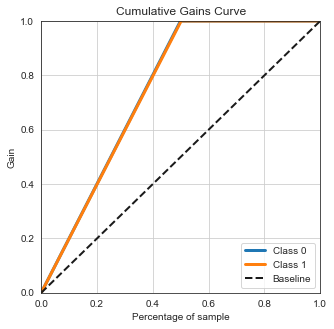

In [132]:
plt.rcParams["figure.figsize"]=5,5
skplt.metrics.plot_cumulative_gain(Y_train, Pred_Y_train_p)
plt.show()

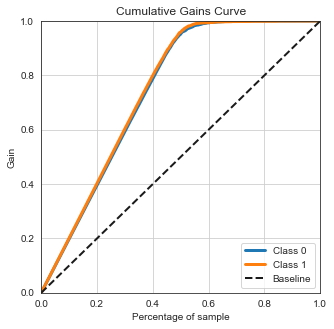

In [133]:
skplt.metrics.plot_cumulative_gain(Y_test, Pred_Y_test_p)
plt.show()

## Hyper-Parameter Tuning of Random Forest using Random Search

In [134]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)
start = time.time()


param = {
              'max_depth':[45,46,47,48,49,50],
              'min_samples_split':[13,14,15,16],
              'n_estimators':[34,35,36,37,38],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']
}

rsearch = RandomizedSearchCV( estimator = rf, param_distributions = param , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)

In [135]:
rsearch.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [136]:
rsearch.best_score_

0.9568639982210362

In [137]:
rsearch.best_params_

{'n_estimators': 38,
 'min_samples_split': 13,
 'max_features': 'auto',
 'max_depth': 49,
 'criterion': 'entropy',
 'bootstrap': False}

In [138]:
Tuned_RF = RandomForestClassifier(n_estimators = 38 , min_samples_split = 13 ,max_features = "auto" , max_depth = 49,
                               criterion = "entropy" , bootstrap = False  )

Tuned_RF.fit(X_train, Y_train)

Tuned_Pred_Y_train = Tuned_RF.predict(X_train)
Tuned_Pred_Y_train_p = Tuned_RF.predict_proba(X_train)

Rf_auc1 = roc_auc_score(Y_train, Tuned_Pred_Y_train)

Tuned_Pred_Y_test = Tuned_RF.predict(X_test)
Tuned_Pred_Y_test_p = Tuned_RF.predict_proba(X_test)

Rf_auc2 = roc_auc_score(Y_test, Tuned_Pred_Y_test)

print("Train", Rf_auc1)
print("Test", Rf_auc2)

Train 0.9879925482233453
Test 0.9562660010240653


In [139]:
eval_metrics(Y_train, Tuned_Pred_Y_train)

accuracy : 0.9879991999466631
Precision : 0.9854458851548028
Recall : 0.9906890130353817
F1 score : 0.9880604934996019
ROC_AUC_Score 0.9879925482233453
Jaccard Similarity Score :  98.8 %


In [140]:
eval_metrics(Y_test, Tuned_Pred_Y_test)

accuracy : 0.9562
Precision : 0.9480776852952834
Recall : 0.964516129032258
F1 score : 0.9562262642414552
ROC_AUC_Score 0.9562660010240653
Jaccard Similarity Score :  95.62 %


In [141]:
confusion_matrix(Y_train, Tuned_Pred_Y_train)

array([[7371,  110],
       [  70, 7448]], dtype=int64)

In [142]:
confusion_matrix(Y_test, Tuned_Pred_Y_test)

array([[2389,  131],
       [  88, 2392]], dtype=int64)

In [143]:
validate_train_tuned_RF = profile_decile(X_train,Y_train,Tuned_RF)
validate_test_tuned_RF = profile_decile(X_test,Y_test,Tuned_RF)

In [144]:
validate_train_tuned_RF

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.997807,1.000000,1500.0,0.0,1500.0
2,0.988038,0.997807,1500.0,0.0,1500.0
3,0.966806,0.987959,1500.0,0.0,1500.0
4,0.906603,0.966806,1500.0,0.0,1500.0
5,0.541707,0.906547,1417.0,82.0,1499.0
6,0.089027,0.541563,101.0,1399.0,1500.0
7,0.027256,0.089014,0.0,1500.0,1500.0
8,0.008772,0.027204,0.0,1500.0,1500.0
9,0.000000,0.008772,0.0,1500.0,1500.0


In [145]:
validate_test_tuned_RF

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.996711,1.000000,500.0,0.0,500.0
2,0.980263,0.996711,500.0,0.0,500.0
3,0.946531,0.980263,500.0,0.0,500.0
4,0.847294,0.946491,486.0,14.0,500.0
5,0.526352,0.847275,398.0,102.0,500.0
6,0.128807,0.525207,87.0,413.0,500.0
7,0.043860,0.128761,4.0,496.0,500.0
8,0.014912,0.043793,2.0,498.0,500.0
9,0.002193,0.014833,1.0,499.0,500.0


## Xtreme Gradient Boosting Classification model (XGboost)

In [146]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, Y_train)

Pred_Y_Train = xgb.predict(X_train)
Pred_Y_Train_p = xgb.predict_proba(X_train)

xgb_accuracy_train = accuracy_score(Y_train, Pred_Y_Train)

Pred_Y_Test = xgb.predict(X_test)
Pred_Y_Test_p = xgb.predict_proba(X_test)

xgb_accuracy_test = accuracy_score(Y_test, Pred_Y_Test)

print("Train", xgb_accuracy_train)
print("Test", xgb_accuracy_test)

Train 0.9830655377025135
Test 0.9624


In [147]:
eval_metrics(Y_train, Pred_Y_Train)

accuracy : 0.9830655377025135
Precision : 0.9806776071995765
Recall : 0.985634477254589
F1 score : 0.9831497943478839
ROC_AUC_Score 0.983059184891163
Jaccard Similarity Score :  98.31 %


In [148]:
eval_metrics(Y_test, Pred_Y_Test)

accuracy : 0.9624
Precision : 0.9558472553699284
Recall : 0.9689516129032258
F1 score : 0.9623548257909492
ROC_AUC_Score 0.9624519969278035
Jaccard Similarity Score :  96.24 %


In [149]:
confusion_matrix(Y_train, Pred_Y_Train)

array([[7335,  146],
       [ 108, 7410]], dtype=int64)

In [150]:
confusion_matrix(Y_test, Pred_Y_Test)

array([[2409,  111],
       [  77, 2403]], dtype=int64)

In [151]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    "max_depth":[11,12,13,14,15],
    "min_child_weight": [2,3,4,5],
    "gamma": [0.3,0.4,0.5,0.6],
    "subsample":[0.7,0.8,0.9],
    "colsample_bytree":[0.7,0.8,0.9],
    "n_estimators":[200,225,250],
    "learning_rate":[0.05,0.1,0.2]
}

rsearchh = RandomizedSearchCV( estimator = XGBClassifier ( objective = "binary:logistic", nthread=4, seed=88),
                  param_distributions = param , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)


In [152]:
rsearchh.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 15.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0.3, 0.4, 0.5, 0.6],
                 

In [153]:
rsearchh.best_params_

{'subsample': 0.9,
 'n_estimators': 225,
 'min_child_weight': 4,
 'max_depth': 11,
 'learning_rate': 0.05,
 'gamma': 0.5,
 'colsample_bytree': 0.7}

In [154]:
rsearchh.best_score_

0.9619310651545476

In [155]:
from xgboost import XGBClassifier

tuned_xgb = XGBClassifier(subsample = 0.9 , n_estimators = 225 , min_child_weight = 4, max_depth = 11 , learning_rate = 0.05,
                        gamma = 0.5, colsample_bytree = 0.7)

tuned_xgb.fit(X_train, Y_train)

tuned_xgb_Pred_Y_Train = tuned_xgb.predict(X_train)
tuned_xgb_Pred_Y_Train_p = tuned_xgb.predict_proba(X_train)

tuned_Xgb_accuracy_train = accuracy_score(Y_train, tuned_xgb_Pred_Y_Train)

tuned_xgb_Pred_Y_Test = tuned_xgb.predict(X_test)
tuned_xgb_Pred_Y_Test_p = tuned_xgb.predict_proba(X_test)

tuned_Xgb_accuracy_test = accuracy_score(Y_test, tuned_xgb_Pred_Y_Test)

print("Train", tuned_Xgb_accuracy_train)
print("Test", tuned_Xgb_accuracy_test)

Train 0.9796653110207347
Test 0.9616


## XGB is very well handling the overfitting , results seems to be satisfactory.

In [156]:
eval_metrics(Y_train, tuned_xgb_Pred_Y_Train)

accuracy : 0.9796653110207347
Precision : 0.9767349636483807
Recall : 0.9828411811652035
F1 score : 0.9797785586421799
ROC_AUC_Score 0.9796574573116485
Jaccard Similarity Score :  97.97 %


In [157]:
eval_metrics(Y_test, tuned_xgb_Pred_Y_Test)

accuracy : 0.9616
Precision : 0.9550517104216388
Recall : 0.9681451612903226
F1 score : 0.9615538646375651
ROC_AUC_Score 0.9616519457245265
Jaccard Similarity Score :  96.16 %


In [158]:
confusion_matrix(Y_train, tuned_xgb_Pred_Y_Train)

array([[7305,  176],
       [ 129, 7389]], dtype=int64)

In [159]:
confusion_matrix(Y_test, tuned_xgb_Pred_Y_Test)

array([[2407,  113],
       [  79, 2401]], dtype=int64)

In [160]:
plt.rcParams["figure.figsize"] = (5,5)

from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(np.array(Y_train), tuned_xgb_Pred_Y_Train)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [161]:
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(Y_test, tuned_xgb_Pred_Y_Test)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [162]:
validate_train_XGB = model_validation(X_train,tuned_xgb_Pred_Y_Train,tuned_xgb)
validate_test_XGB = model_validation(X_test,tuned_xgb_Pred_Y_Test,tuned_xgb)

In [163]:
validate_train_XGB

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.998343,0.999805,1500.0,0.0,1500.0
2,0.995848,0.998342,1500.0,0.0,1500.0
3,0.987109,0.995845,1500.0,0.0,1500.0
4,0.939331,0.987106,1500.0,0.0,1500.0
5,0.546624,0.939304,1499.0,0.0,1499.0
6,0.043624,0.545928,66.0,1434.0,1500.0
7,0.009139,0.043602,0.0,1500.0,1500.0
8,0.003194,0.009136,0.0,1500.0,1500.0
9,0.001205,0.003193,0.0,1500.0,1500.0


In [164]:
validate_test_XGB

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.998360,0.999815,500.0,0.0,500.0
2,0.995926,0.998359,500.0,0.0,500.0
3,0.986302,0.995920,500.0,0.0,500.0
4,0.933427,0.986282,500.0,0.0,500.0
5,0.526291,0.932948,500.0,0.0,500.0
6,0.042748,0.525903,14.0,486.0,500.0
7,0.009454,0.042541,0.0,500.0,500.0
8,0.003151,0.009407,0.0,500.0,500.0
9,0.001192,0.003142,0.0,500.0,500.0


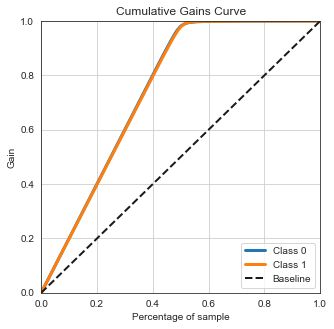

In [165]:
skplt.metrics.plot_cumulative_gain(Y_train, tuned_xgb_Pred_Y_Train_p)
plt.show()

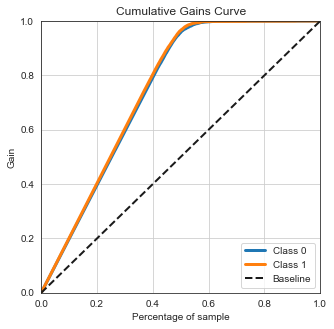

In [166]:
skplt.metrics.plot_cumulative_gain(Y_test, tuned_xgb_Pred_Y_Test_p)
plt.show()

In [192]:
imp_features = pd.DataFrame({'feature': X_train.columns,
                   'importance': tuned_xgb.feature_importances_*100}).\
                    sort_values('importance', ascending = False)

In [193]:
imp_features

,feature,importance
25,SALES_CHANNEL_Call Centers,6.820143
24,SALES_CHANNEL_Call Center,6.801900
50,Satellite_SM5,6.574444
26,SALES_CHANNEL_Retail/Others,6.331600
31,SALES_CHANNEL_Web orders,5.925551
2,SITE_TYPE_DESC,5.651404
27,SALES_CHANNEL_Retail/others,5.595551
13,SERVICE_PLAN_Power150,5.267970
30,SALES_CHANNEL_Web Orders,5.075121
16,SERVICE_PLAN_SO,4.154067


## Decision Trees

In [167]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, Y_train)

dt_Pred_X = dtree.predict(X_train)

accuracy1 = accuracy_score(Y_train, dt_Pred_X)

dt_Pred_Y = dtree.predict(X_test)

accuracy2 = accuracy_score(Y_test, dt_Pred_Y)

print("Train", accuracy1)
print("Test", accuracy2)

Train 1.0
Test 0.928


In [168]:
eval_metrics(Y_train, dt_Pred_X)

accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 score : 1.0
ROC_AUC_Score 1.0
Jaccard Similarity Score :  100.0 %


In [169]:
eval_metrics(Y_test, dt_Pred_Y)

accuracy : 0.928
Precision : 0.9288025889967637
Recall : 0.9258064516129032
F1 score : 0.9273021001615509
ROC_AUC_Score 0.9279825908858168
Jaccard Similarity Score :  92.8 %


In [170]:
confusion_matrix(Y_train, dt_Pred_X)

array([[7481,    0],
       [   0, 7518]], dtype=int64)

In [171]:
confusion_matrix(Y_test, dt_Pred_Y)

array([[2344,  176],
       [ 184, 2296]], dtype=int64)

## Tuning Decision Trees using Randomized search

In [176]:
from sklearn.model_selection import RandomizedSearchCV

param = {'max_depth': [22,23,24,25,26],
                  'max_features': [11,12,13,14],
                 'criterion':['gini','entropy']
        }

rsearch_dt = RandomizedSearchCV( estimator =  DecisionTreeClassifier(),
                  param_distributions = param , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)


In [177]:
rsearch_dt.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [178]:
rsearch_dt.best_params_

{'max_features': 14, 'max_depth': 26, 'criterion': 'entropy'}

In [179]:
rsearch_dt.best_score_

0.9249951078496776

In [180]:
dtree_tuned = DecisionTreeClassifier(max_features = 14, max_depth = 26 , criterion = "entropy" , random_state = 42)

dtree_tuned.fit(X_train, Y_train)

tuned_dt_Pred_X_train = dtree_tuned.predict(X_train)

tuned_accuracy_train = accuracy_score(Y_train, tuned_dt_Pred_X_train)

tuned_dt_Pred_Y_test = dtree_tuned.predict(X_test)

tuned_accuracy_test = accuracy_score(Y_test, tuned_dt_Pred_Y_test)

print("Train", tuned_accuracy_train)
print("Test", tuned_accuracy_test)

Train 0.9864657643842922
Test 0.9218


In [181]:
eval_metrics(Y_train, tuned_dt_Pred_X_train)

accuracy : 0.9864657643842922
Precision : 0.9843729307376506
Recall : 0.9886938015429636
F1 score : 0.9865286349459155
ROC_AUC_Score 0.9864602546011837
Jaccard Similarity Score :  98.65 %


In [182]:
eval_metrics(Y_test, tuned_dt_Pred_Y_test)

accuracy : 0.9218
Precision : 0.9169660678642715
Recall : 0.9262096774193549
F1 score : 0.9215646940822468
ROC_AUC_Score 0.9218349974398361
Jaccard Similarity Score :  92.18 %


In [183]:
confusion_matrix(Y_train, tuned_dt_Pred_X_train)

array([[7363,  118],
       [  85, 7433]], dtype=int64)

In [184]:
confusion_matrix(Y_test, tuned_dt_Pred_Y_test)

array([[2312,  208],
       [ 183, 2297]], dtype=int64)

## K-Nearest-Neighbour Classifier

In [185]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Object.
knn = KNeighborsClassifier()

knn.fit(X_train,Y_train)

Pred_train =knn.predict(X_train)
Pred_train_prob =knn.predict_proba(X_train)

Accuracy_1 = roc_auc_score(Y_train, Pred_train)

Pred_test = knn.predict(X_test)
Pred_test_prob =knn.predict_proba(X_test)

Accuracy_2 = roc_auc_score(Y_test, Pred_test)
print("Train", Accuracy_1)
print("Test", Accuracy_2)

Train 0.9483932853358863
Test 0.9280273937532003


In [186]:
eval_metrics(Y_train,Pred_train)

accuracy : 0.9483965597706514
Precision : 0.947452229299363
Recall : 0.9497206703910615
F1 score : 0.9485850936628138
ROC_AUC_Score 0.9483932853358863
Jaccard Similarity Score :  94.84 %


In [187]:
eval_metrics(Y_test,Pred_test)

accuracy : 0.928
Precision : 0.924
Recall : 0.9314516129032258
F1 score : 0.927710843373494
ROC_AUC_Score 0.9280273937532003
Jaccard Similarity Score :  92.8 %


In [188]:
confusion_matrix(Y_train,Pred_train)

array([[7085,  396],
       [ 378, 7140]], dtype=int64)

In [189]:
confusion_matrix(Y_test,Pred_test)

array([[2330,  190],
       [ 170, 2310]], dtype=int64)

## Tuning KNN Classifier using Randomized search

In [190]:
#List Hyperparameters that we want to tune.

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary

hyperparam = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object

knn_2 = KNeighborsClassifier()

from sklearn.model_selection import RandomizedSearchCV

rsearch_knn = RandomizedSearchCV( estimator = knn_2,
                  param_distributions = hyperparam , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)


In [191]:
rsearch_knn.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
      

In [194]:
rsearch_knn.best_params_

{'p': 1, 'n_neighbors': 21, 'leaf_size': 43}

In [195]:
rsearch_knn.best_score_

0.9335958194351791

## Tuned KNN classifer

In [196]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Object.
tuned_knn = KNeighborsClassifier(p = 1 , n_neighbors = 21 , leaf_size = 43)

tuned_knn.fit(X_train,Y_train)

tuned_knn_Pred_train =tuned_knn.predict(X_train)
tuned_knn_Pred_train_prob =tuned_knn.predict_proba(X_train)

Tuned_Accuracy_1 = roc_auc_score(Y_train, tuned_knn_Pred_train)

tuned_knn_Pred_test = tuned_knn.predict(X_test)
tuned_knn_Pred_test_prob =tuned_knn.predict_proba(X_test)

Tuned_Accuracy_2 = roc_auc_score(Y_test, tuned_knn_Pred_test)
print("Train", Tuned_Accuracy_1)
print("Test", Tuned_Accuracy_2)

Train 0.9430671294654092
Test 0.9416122631848438


In [197]:
eval_metrics(Y_train, tuned_knn_Pred_train)

accuracy : 0.9430628708580572
Precision : 0.9448598130841122
Recall : 0.9413407821229051
F1 score : 0.9430970149253732
ROC_AUC_Score 0.9430671294654092
Jaccard Similarity Score :  94.31 %


In [198]:
eval_metrics(Y_test, tuned_knn_Pred_test)

accuracy : 0.9416
Precision : 0.9393574297188755
Recall : 0.9431451612903226
F1 score : 0.9412474849094566
ROC_AUC_Score 0.9416122631848438
Jaccard Similarity Score :  94.16 %


In [199]:
confusion_matrix(Y_train, tuned_knn_Pred_train)

array([[7068,  413],
       [ 441, 7077]], dtype=int64)

In [200]:
confusion_matrix(Y_test, tuned_knn_Pred_test)

array([[2369,  151],
       [ 141, 2339]], dtype=int64)

In [276]:
plt.rcParams["figure.figsize"] = (5,5)

from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(np.array(Y_train), tuned_knn_Pred_train)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [280]:
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(np.array(Y_test), tuned_knn_Pred_test)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [311]:
validate_train_knn = model_validation(X_train,tuned_xgb_Pred_Y_Train,tuned_knn)
validate_test_knn = model_validation(X_test,tuned_xgb_Pred_Y_Test,tuned_knn)

In [312]:
validate_train_knn

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,1.000000,1.000000,1500.0,0.0,1500.0
2,0.952381,1.000000,1500.0,0.0,1500.0
3,0.857143,0.952381,1499.0,1.0,1500.0
4,0.714286,0.857143,1485.0,15.0,1500.0
5,0.476190,0.714286,1224.0,275.0,1499.0
6,0.238095,0.476190,337.0,1163.0,1500.0
7,0.142857,0.238095,19.0,1481.0,1500.0
8,0.047619,0.142857,1.0,1499.0,1500.0
9,0.000000,0.047619,0.0,1500.0,1500.0


In [313]:
validate_test_knn

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,1.000000,1.000000,500.0,0.0,500.0
2,0.952381,1.000000,500.0,0.0,500.0
3,0.857143,0.952381,499.0,1.0,500.0
4,0.714286,0.857143,492.0,8.0,500.0
5,0.476190,0.714286,404.0,96.0,500.0
6,0.238095,0.476190,115.0,385.0,500.0
7,0.142857,0.238095,4.0,496.0,500.0
8,0.047619,0.142857,0.0,500.0,500.0
9,0.000000,0.047619,0.0,500.0,500.0


## Support Vector Classifiers (SVM)

In [201]:
#Running SVM with default hyperparameter
from sklearn.svm import SVC

svc = SVC() #Default hyperparameters

svc.fit(X_train,Y_train)

y_pred_test =svc.predict(X_test)

y_pred_train =svc.predict(X_train)

print('Accuracy Score:')
print("TEST" ,accuracy_score(Y_test,y_pred_test))
print("TRAIN", accuracy_score(Y_train,y_pred_train))

Accuracy Score:
TEST 0.957
TRAIN 0.9705313687579172


In [202]:
eval_metrics(Y_train,y_pred_train)

accuracy : 0.9705313687579172
Precision : 0.9665084388185654
Recall : 0.9749933492950252
F1 score : 0.9707323533306846
ROC_AUC_Score 0.9705203345860236
Jaccard Similarity Score :  97.05 %


In [203]:
eval_metrics(Y_test,y_pred_test)

accuracy : 0.957
Precision : 0.9470983024082116
Recall : 0.9673387096774193
F1 score : 0.957111510073808
ROC_AUC_Score 0.957082053251408
Jaccard Similarity Score :  95.7 %


In [204]:
confusion_matrix(Y_train,y_pred_train)

array([[7227,  254],
       [ 188, 7330]], dtype=int64)

In [205]:
confusion_matrix(Y_test,y_pred_test)

array([[2386,  134],
       [  81, 2399]], dtype=int64)

In [206]:
tune_params = {
 'C': (np.arange(0.1,1,0.01)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }


rsearch_svm = RandomizedSearchCV( estimator = svc,
                  param_distributions = tune_params , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)


In [207]:
rsearch_svm.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'degree': [2, 3, 4],
                                        'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                                        'kernel': ['poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=2)

In [208]:
rsearch_svm.best_params_

{'kernel': 'poly', 'gamma': 0.05, 'degree': 2, 'C': 0.8}

In [209]:
rsearch_svm.best_score_

0.9473964420724927

In [305]:
#Running SVM with tuned hyperparameter

tuned_svc = SVC(kernel="poly",gamma = 0.05 , degree = 2, C = 0.8 , probability=True) 

tuned_svc.fit(X_train,Y_train)

tuned_svc_Y_pred_train =tuned_svc.predict(X_train)

tuned_svc_Y_pred_test =tuned_svc.predict(X_test)

print('Accuracy Score:')
print("TRAIN", accuracy_score(Y_train,tuned_svc_Y_pred_train))
print("TEST" ,accuracy_score(Y_test,tuned_svc_Y_pred_test))

Accuracy Score:
TRAIN 0.9525968397893193
TEST 0.9532


In [306]:
eval_metrics(Y_train,tuned_svc_Y_pred_train)

accuracy : 0.9525968397893193
Precision : 0.9491883331133694
Recall : 0.9566374035647779
F1 score : 0.952898310698907
ROC_AUC_Score 0.9525868477521791
Jaccard Similarity Score :  95.26 %


In [307]:
eval_metrics(Y_test,tuned_svc_Y_pred_test)

accuracy : 0.9532
Precision : 0.9459888800635425
Recall : 0.9604838709677419
F1 score : 0.9531812725090035
ROC_AUC_Score 0.9532578084997438
Jaccard Similarity Score :  95.32 %


In [308]:
confusion_matrix(Y_train,tuned_svc_Y_pred_train)

array([[7096,  385],
       [ 326, 7192]], dtype=int64)

In [309]:
confusion_matrix(Y_test,tuned_svc_Y_pred_test)

array([[2384,  136],
       [  98, 2382]], dtype=int64)

In [318]:
validate_train_svc = model_validation(X_train,tuned_svc_Y_pred_train,tuned_svc)
validate_test_svc = model_validation(X_test,tuned_svc_Y_pred_test,tuned_svc)

In [319]:
validate_train_svc

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.999998,1.000000,1500.0,0.0,1500.0
2,0.996049,0.999998,1500.0,0.0,1500.0
3,0.986054,0.996047,1500.0,0.0,1500.0
4,0.945576,0.986051,1500.0,0.0,1500.0
5,0.533147,0.945549,1499.0,0.0,1499.0
6,0.054323,0.532405,78.0,1422.0,1500.0
7,0.012437,0.054288,0.0,1500.0,1500.0
8,0.003216,0.012431,0.0,1500.0,1500.0
9,0.000827,0.003204,0.0,1500.0,1500.0


In [320]:
validate_test_svc

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.999998,1.000000,500.0,0.0,500.0
2,0.996257,0.999998,500.0,0.0,500.0
3,0.986246,0.996221,500.0,0.0,500.0
4,0.934461,0.986210,500.0,0.0,500.0
5,0.516586,0.934144,500.0,0.0,500.0
6,0.060300,0.514834,18.0,482.0,500.0
7,0.011591,0.060211,0.0,500.0,500.0
8,0.003418,0.011590,0.0,500.0,500.0
9,0.000863,0.003402,0.0,500.0,500.0


In [296]:
from sklearn.metrics import roc_curve,auc
plt.rcParams["figure.figsize"] = (5,5)
fpr, tpr, _ = roc_curve(np.array(Y_train), tuned_svc_Y_pred_train)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [300]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, _ = roc_curve(np.array(Y_test), tuned_svc_Y_pred_test)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

## Logistic Regresssion

In [215]:
#Running LM with default hyperparameter
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression() #Default hyperparameters

lm.fit(X_train,Y_train)

lm_Y_pred_test =lm.predict(X_test)

lm_Y_pred_train =lm.predict(X_train)

print('Accuracy Score:')
print("TEST" ,accuracy_score(Y_test,lm_Y_pred_test))
print("TRAIN", accuracy_score(Y_train,lm_Y_pred_train))

Accuracy Score:
TEST 0.9288
TRAIN 0.9280618707913861


In [301]:
lm.coef_

array([[ 0.09462713, -1.06116057,  1.59419382,  0.03195757,  0.46628304,
         0.70043436,  1.48584936,  0.24929831, -1.09202883, -0.93164023,
        -0.02842226, -0.40070737,  3.76729448, -4.64242492,  0.06223517,
        -0.51242642,  3.76675565,  0.01190958,  0.25203006,  0.76168623,
         1.95549005, -0.58808832,  0.48723793, -2.8678111 , -4.80722776,
         4.36265182,  4.69988562, -4.40710007,  0.04308164,  0.14449922,
         4.69963366, -4.73487927,  0.06375964,  0.27174973, -0.03285431,
        -0.0247406 , -0.15053382, -0.04539903,  0.0433303 , -0.11743488,
         0.07289802, -0.08023022, -1.04910725, -1.40581795,  1.3412734 ,
        -2.03350393,  1.46258475,  1.93560848,  1.15915809,  0.07400015,
        -2.33532361,  1.06869771, -0.04259046, -0.17443454,  0.56332437,
        -0.44573839, -0.11704113]])

Feature: 0, Score: 0.09463
Feature: 1, Score: -1.06116
Feature: 2, Score: 1.59419
Feature: 3, Score: 0.03196
Feature: 4, Score: 0.46628
Feature: 5, Score: 0.70043
Feature: 6, Score: 1.48585
Feature: 7, Score: 0.24930
Feature: 8, Score: -1.09203
Feature: 9, Score: -0.93164
Feature: 10, Score: -0.02842
Feature: 11, Score: -0.40071
Feature: 12, Score: 3.76729
Feature: 13, Score: -4.64242
Feature: 14, Score: 0.06224
Feature: 15, Score: -0.51243
Feature: 16, Score: 3.76676
Feature: 17, Score: 0.01191
Feature: 18, Score: 0.25203
Feature: 19, Score: 0.76169
Feature: 20, Score: 1.95549
Feature: 21, Score: -0.58809
Feature: 22, Score: 0.48724
Feature: 23, Score: -2.86781
Feature: 24, Score: -4.80723
Feature: 25, Score: 4.36265
Feature: 26, Score: 4.69989
Feature: 27, Score: -4.40710
Feature: 28, Score: 0.04308
Feature: 29, Score: 0.14450
Feature: 30, Score: 4.69963
Feature: 31, Score: -4.73488
Feature: 32, Score: 0.06376
Feature: 33, Score: 0.27175
Feature: 34, Score: -0.03285
Feature: 35, Scor

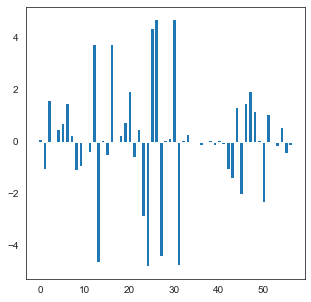

In [303]:
import matplotlib.pyplot as pyplot
# get importance
importance = lm.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [216]:
eval_metrics(Y_train,lm_Y_pred_train)

accuracy : 0.9280618707913861
Precision : 0.9289806795469687
Recall : 0.9273743016759777
F1 score : 0.9281767955801105
ROC_AUC_Score 0.9280635711026594
Jaccard Similarity Score :  92.81 %


In [217]:
eval_metrics(Y_test,lm_Y_pred_test)

accuracy : 0.9288
Precision : 0.9224343675417661
Recall : 0.9350806451612903
F1 score : 0.9287144573488186
ROC_AUC_Score 0.9288498463901691
Jaccard Similarity Score :  92.88 %


In [218]:
confusion_matrix(Y_train,lm_Y_pred_train)

array([[6948,  533],
       [ 546, 6972]], dtype=int64)

In [219]:
confusion_matrix(Y_test,lm_Y_pred_test)

array([[2325,  195],
       [ 161, 2319]], dtype=int64)

In [327]:
validate_train_lm = model_validation(X_train,lm_Y_pred_train,lm)
validate_test_lm = model_validation(X_test,lm_Y_pred_test,lm)

## Trying penalties l1& l2 

In [220]:
grid = {
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"]
} 

logreg = LogisticRegression()

rsearch_lm = RandomizedSearchCV( estimator = logreg,
                  param_distributions = grid , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)

rsearch_lm.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",rsearch_lm.best_params_)
print("accuracy :",rsearch_lm.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.1s finished


tuned hpyerparameters :(best parameters)  {'penalty': 'l2', 'C': 100.0}
accuracy : 0.9272626195241273


In [221]:
#Running LM with tuned hyperparameter

tuned_lm = LogisticRegression(penalty = "l2" , C = 100.0) #Tuned hyperparameters

tuned_lm.fit(X_train,Y_train)

tuned_Y_Pred_test = tuned_lm.predict(X_test)

tuned_Y_Pred_train = tuned_lm.predict(X_train)

print('Accuracy Score:')
print("TEST" ,accuracy_score(Y_test,tuned_Y_Pred_test))
print("TRAIN", accuracy_score(Y_train,tuned_Y_Pred_train))

Accuracy Score:
TEST 0.9294
TRAIN 0.9283952263484232


In [222]:
eval_metrics(Y_test,tuned_Y_Pred_test)

accuracy : 0.9294
Precision : 0.9228628230616303
Recall : 0.9358870967741936
F1 score : 0.9293293293293293
ROC_AUC_Score 0.9294514848950335
Jaccard Similarity Score :  92.94 %


In [223]:
eval_metrics(Y_train,tuned_Y_Pred_train)

accuracy : 0.9283952263484232
Precision : 0.9293710021321961
Recall : 0.9276403298749667
F1 score : 0.9285048595393423
ROC_AUC_Score 0.928397093155636
Jaccard Similarity Score :  92.84 %


In [224]:
confusion_matrix(Y_test,tuned_Y_Pred_test)

array([[2326,  194],
       [ 159, 2321]], dtype=int64)

In [225]:
confusion_matrix(Y_train,tuned_Y_Pred_train)

array([[6951,  530],
       [ 544, 6974]], dtype=int64)

# Dimesnionality Reduction using PCA

In [228]:
XX = X.copy()
YY = Y.copy()

pc = PCA()

X = pc.fit_transform(X)
X = pd.DataFrame(X)

plt.rcParams["figure.figsize"] = (5,5)

variance = np.cumsum (np.round(pc.explained_variance_ratio_, decimals=4)*100)

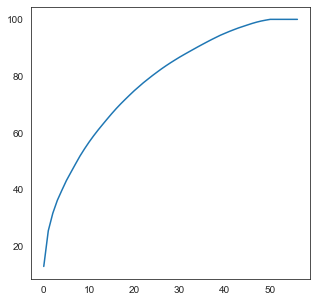

In [229]:
plt.plot(variance)

In [230]:
PC = PCA(n_components = 40)

XX = PC.fit_transform(XX)
XX = pd.DataFrame(XX)

from sklearn.model_selection import train_test_split

XX_train, XX_test, YY_train, YY_test = train_test_split( XX, YY , test_size=0.2, random_state=42)


## Random Forest using Principal Components

In [231]:
rf_pca = RandomForestClassifier()

rf_pca.fit(XX_train, YY_train)

rf_Pred_X = rf_pca.predict(XX_train)

Rf_accuracy1 = accuracy_score(YY_train, rf_Pred_X)

rf_Pred_Y = rf_pca.predict(XX_test)

Rf_accuracy2 = accuracy_score(YY_test, rf_Pred_Y)

print("Train", Rf_accuracy1)
print("Test", Rf_accuracy2)

Train 1.0
Test 0.946


In [232]:
eval_metrics(YY_train, rf_Pred_X)

accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 score : 1.0
ROC_AUC_Score 1.0
Jaccard Similarity Score :  100.0 %


In [233]:
eval_metrics(YY_test, rf_Pred_Y)

accuracy : 0.946
Precision : 0.9337585868498528
Recall : 0.9591733870967742
F1 score : 0.9462953754351069
ROC_AUC_Score 0.9461045506912443
Jaccard Similarity Score :  94.6 %


In [234]:
confusion_matrix(YY_train, rf_Pred_X) 

array([[7985,    0],
       [   0, 8014]], dtype=int64)

In [235]:
confusion_matrix(YY_test, rf_Pred_Y) 

array([[1881,  135],
       [  81, 1903]], dtype=int64)

In [236]:
rf_pca_validate_train = model_validation(XX_train,YY_train,rf_pca)
rf_pca_validate_test = model_validation(XX_test,YY_test,rf_pca)

In [237]:
rf_pca_validate_train

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.99,1.00,1600.0,0.0,1600.0
2,0.98,0.99,1600.0,0.0,1600.0
3,0.95,0.98,1600.0,0.0,1600.0
4,0.91,0.95,1600.0,0.0,1600.0
5,0.64,0.91,1599.0,0.0,1599.0
6,0.10,0.64,15.0,1585.0,1600.0
7,0.04,0.10,0.0,1600.0,1600.0
8,0.02,0.04,0.0,1600.0,1600.0
9,0.00,0.02,0.0,1600.0,1600.0


In [238]:
rf_pca_validate_test

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.98,1.00,400.0,0.0,400.0
2,0.94,0.98,399.0,1.0,400.0
3,0.87,0.94,397.0,3.0,400.0
4,0.76,0.87,382.0,18.0,400.0
5,0.54,0.76,310.0,90.0,400.0
6,0.25,0.54,81.0,319.0,400.0
7,0.12,0.25,10.0,390.0,400.0
8,0.06,0.12,4.0,396.0,400.0
9,0.02,0.06,0.0,400.0,400.0


In [239]:
from sklearn.metrics import auc
preds = rf_pca.predict(XX_train)
fpr, tpr, _ = roc_curve(np.array(YY_train), preds)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [240]:
from sklearn.metrics import auc
predss = rf_pca.predict(XX_test)
fpr, tpr, _ = roc_curve(np.array(YY_test), predss)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [241]:
from sklearn.model_selection import RandomizedSearchCV

tuned_pca_rf = RandomForestClassifier(random_state=42)
start = time.time()


Param = {
              'max_depth':[45,46,47,48,49,50],
              'min_samples_split':[13,14,15,16],
              'n_estimators':[34,35,36,37,38],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']
}

rsearch_pca_rf = RandomizedSearchCV( estimator = tuned_pca_rf, param_distributions = Param , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)

In [242]:
rsearch_pca_rf.fit(XX_train,YY_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.5min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [243]:
rsearch_pca_rf.best_params_

{'n_estimators': 35,
 'min_samples_split': 13,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': False}

In [244]:
rsearch_pca_rf.best_score_

0.9441837867417135

## Random Forest HyperParam Tuning 

In [245]:
tuned_pca_rf = RandomForestClassifier(n_estimators=35,min_samples_split=13,max_features="auto",max_depth=50, criterion = "gini",
                             bootstrap=False,random_state=42)
tuned_pca_rf.fit(XX_train, YY_train)

tuned_pca_Pred_X = tuned_pca_rf.predict(XX_train)

tuned_pca_rf_accuracy1 = accuracy_score(YY_train, tuned_pca_Pred_X)

tuned_pca_Pred_Y = tuned_pca_rf.predict(XX_test)

tuned_pca_rf_accuracy2 = accuracy_score(YY_test, tuned_pca_Pred_Y)

print("Train", tuned_pca_rf_accuracy1)
print("Test", tuned_pca_rf_accuracy2)

Train 0.9994999687480468
Test 0.947


In [246]:
eval_metrics(YY_train, tuned_pca_Pred_X)

accuracy : 0.9994999687480468
Precision : 0.9996255616575137
Recall : 0.9993760918392812
F1 score : 0.9995008111818295
ROC_AUC_Score 0.9995001936967227
Jaccard Similarity Score :  99.95 %


In [247]:
eval_metrics(YY_test, tuned_pca_Pred_Y)

accuracy : 0.947
Precision : 0.9317738791423001
Recall : 0.9637096774193549
F1 score : 0.9474727452923687
ROC_AUC_Score 0.9471326164874553
Jaccard Similarity Score :  94.7 %


In [248]:
confusion_matrix(YY_train, tuned_pca_Pred_X)

array([[7982,    3],
       [   5, 8009]], dtype=int64)

In [249]:
confusion_matrix(YY_test, tuned_pca_Pred_Y)

array([[1876,  140],
       [  72, 1912]], dtype=int64)

## XGB using Principal Components

In [250]:
pca_xgb = XGBClassifier()

pca_xgb.fit(XX_train, YY_train)

pca_xgb_train_pred = pca_xgb.predict(XX_train)

pca_xgb_accuracy_1 = accuracy_score(YY_train, pca_xgb_train_pred)

pca_xgb_test_pred = pca_xgb.predict(XX_test)

pca_xgb_accuracy_2 = accuracy_score(YY_test, pca_xgb_test_pred)
print("Train", pca_xgb_accuracy_1)
print("Test", pca_xgb_accuracy_2)

Train 0.9993124570285643
Test 0.95275


In [331]:
eval_metrics(YY_train, pca_xgb_train_pred)

accuracy : 0.9993124570285643
Precision : 0.9995006865559856
Recall : 0.9991265285749937
F1 score : 0.9993135725429019
ROC_AUC_Score 0.9993127946569396
Jaccard Similarity Score :  99.93 %


In [332]:
eval_metrics(YY_test, pca_xgb_test_pred)

accuracy : 0.95275
Precision : 0.9427725703009373
Recall : 0.9632056451612904
F1 score : 0.9528795811518325
ROC_AUC_Score 0.952832981310804
Jaccard Similarity Score :  95.28 %


In [334]:
confusion_matrix(YY_train, pca_xgb_train_pred)

array([[7981,    4],
       [   7, 8007]], dtype=int64)

In [335]:
confusion_matrix(YY_test, pca_xgb_test_pred)

array([[1900,  116],
       [  73, 1911]], dtype=int64)

In [251]:
from sklearn.model_selection import RandomizedSearchCV

Params = {
    "max_depth":[11,12,13],
    "min_child_weight": [3,4,5],
    "gamma": [0.2,0.3,0.4],
    "subsample":[0.7,0.8,0.9],
    "colsample_bytree":[0.7,0.8,0.9],
    "n_estimators":[200,225,250],
    "learning_rate":[0.05,0.1,0.2]
}
rsearch_XGB = RandomizedSearchCV( estimator = XGBClassifier ( objective = "binary:logistic", nthread=4, seed=88),
                  param_distributions = Params , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)

In [252]:
rsearch_XGB.fit(XX_train,YY_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0.2, 0.3, 0.4],
                      

In [253]:
rsearch_XGB.best_params_

{'subsample': 0.8,
 'n_estimators': 250,
 'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.9}

# GridSearchCv

In [268]:
fit_rf = RandomForestClassifier(random_state=42)
start = time.time()

param_dist = {

'max_depth':[44,45,46,47,48],
'min_samples_split':[10,11,12,13,14],
'n_estimators':[31,32,33,34,35],
'bootstrap': [True, False],
'max_features': ['auto', 'sqrt', None],
'criterion': ['gini', 'entropy']
             } 

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

cv_rf.best_score_

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed: 52.9min finished


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 44, 'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 31}
Time taken in grid search:  3175.69


0.955263865733022

In [254]:
rsearch_XGB.best_score_

0.954497029393371

In [255]:
tuned_pca_xgb = XGBClassifier(subsample = 0.8, n_estimators = 250 , min_child_weight = 3 , max_depth = 12 , 
                    learning_rate = 0.1 ,gamma = 0.4, colsample_bytree = 0.9)

tuned_pca_xgb.fit(XX_train, YY_train)

tuned_pca_xgb_pred_train = tuned_pca_xgb.predict(XX_train)
tuned_pca_xgb_pred_train_prob = tuned_pca_xgb.predict_proba(XX_train)

tuned_pca_xgb_accuracy_1 = accuracy_score(YY_train, tuned_pca_xgb_pred_train)

tuned_pca_xgb_pred_test = tuned_pca_xgb.predict(XX_test)
tuned_pca_xgb_pred_test_prob = tuned_pca_xgb.predict_proba(XX_test)

tuned_pca_xgb_accuracy_2 = accuracy_score(YY_test, tuned_pca_xgb_pred_test)
print("Train", tuned_pca_xgb_accuracy_1)
print("Test", tuned_pca_xgb_accuracy_2)

Train 1.0
Test 0.95325


In [256]:
eval_metrics(YY_train, tuned_pca_xgb_pred_train)

accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 score : 1.0
ROC_AUC_Score 1.0
Jaccard Similarity Score :  100.0 %


In [257]:
eval_metrics(YY_test, tuned_pca_xgb_pred_test)

accuracy : 0.95325
Precision : 0.941957697983276
Recall : 0.9652217741935484
F1 score : 0.9534478466517301
ROC_AUC_Score 0.9533450140809012
Jaccard Similarity Score :  95.32 %


In [258]:
confusion_matrix(YY_train, tuned_pca_xgb_pred_train)

array([[7985,    0],
       [   0, 8014]], dtype=int64)

In [259]:
confusion_matrix(YY_test, tuned_pca_xgb_pred_test)

array([[1898,  118],
       [  69, 1915]], dtype=int64)

In [260]:
tuned_pca_xgb_pred_train_prob = pd.DataFrame(tuned_pca_xgb_pred_train_prob)
tuned_pca_xgb_pred_test_prob = pd.DataFrame(tuned_pca_xgb_pred_test_prob)

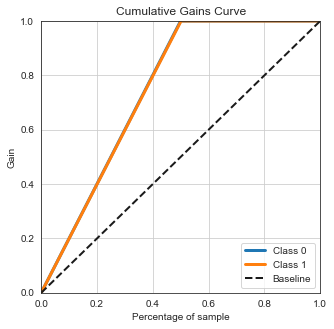

In [261]:
skplt.metrics.plot_cumulative_gain(YY_train, tuned_pca_xgb_pred_train_prob)
plt.show()

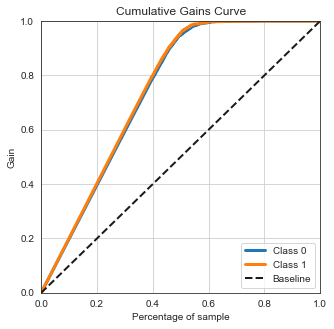

In [262]:
skplt.metrics.plot_cumulative_gain(YY_test, tuned_pca_xgb_pred_test_prob)
plt.show()

In [263]:
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(np.array(YY_train), tuned_pca_xgb_pred_train)
auc = auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [264]:
fpr, tpr, _ = metrics.roc_curve(np.array(YY_test), tuned_pca_xgb_pred_test)
auc = metrics.auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [270]:
tuned_pca_xgb_validate_train = model_validation(XX_train,YY_train,tuned_pca_xgb)
tuned_pca_xgb_validate_test = model_validation(XX_test,YY_test,tuned_pca_xgb)

In [271]:
tuned_pca_xgb_validate_train

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.999782,0.999993,1600.0,0.0,1600.0
2,0.999276,0.999782,1600.0,0.0,1600.0
3,0.997506,0.999275,1600.0,0.0,1600.0
4,0.988416,0.997503,1600.0,0.0,1600.0
5,0.833128,0.988398,1599.0,0.0,1599.0
6,0.009953,0.832277,15.0,1585.0,1600.0
7,0.001880,0.009938,0.0,1600.0,1600.0
8,0.000542,0.001876,0.0,1600.0,1600.0
9,0.000167,0.000542,0.0,1600.0,1600.0


In [272]:
tuned_pca_xgb_validate_test

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.999769,0.999990,400.0,0.0,400.0
2,0.999184,0.999769,400.0,0.0,400.0
3,0.996756,0.999183,399.0,1.0,400.0
4,0.975389,0.996730,390.0,10.0,400.0
5,0.615380,0.975270,308.0,92.0,400.0
6,0.022219,0.614419,80.0,320.0,400.0
7,0.002560,0.022065,5.0,395.0,400.0
8,0.000643,0.002551,2.0,398.0,400.0
9,0.000179,0.000642,0.0,400.0,400.0


In [ ]:
tuned_pca_xgb_validate_train.to_csv("C:\\TELECOM\\profile_trainn.csv")
tuned_pca_xgb_validate_test.to_csv("C:\\TELECOM\\profile_testt.csv")